In the name of God


---

# Engineering Probability and Statistics
Sharif University of Technology - Department of Computer Engineering
Fall 1403

---
## Practical Assignment - Phase 1


__Course Instructor__: Dr. Abolfazl  Motahari

__Notebook Authors__: Seyed Mohammad Hossein Hosseini & Sina Mohammadi

Name: Kiarash Sanei
Student-ID: 402106156

## Objective

In this assignment, you will learn the basics of the R programming language by working with the *Autistic Spectrum Disorder Screening Data for Adult* dataset. The goal is to explore, analyze, and gain insights from the dataset while applying statistical concepts.

## Dataset Overview
The *Autistic Spectrum Disorder Screening Data for Adult* dataset contains information about participants' responses to screening questions, demographic details, and whether they are classified as having Autism Spectrum Disorder (ASD).

Key Variables:

*   **A1_Score to A10_Score**: Responses to screening questions (0 = No, 1 = Yes).
*   **age**: Participant's age.
*   **gender**: Participant's gender.
*   **ethnicity**: Ethnic background.
*   **jundice**: History of jaundice as a baby (Yes/No).
*   **austim**: Family history of autism (Yes/No).
*   **result**: Screening score.
*   **Class/ASD**: Diagnosis result (Yes/No).

## Loading the dataset

1.   Import the required libraries in R.
2.   Load the Autism-Adult-Data.arff file using an appropriate library.
3. Display the first few rows to understand the structure of the dataset.

In [4]:
# Install the required library (if not already installed)
if (!require("foreign")) {
  install.packages("foreign")
}

# Load the foreign library
library(foreign)

# Specify the file path (update the path if necessary)
file_path <- "Autism-Adult-Data.arff"

# Load the ARFF file
autism_data <- read.arff(file_path)

# Display the first few rows
head(autism_data)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,⋯,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1,1,1,1,0,0,1,1,0,0,⋯,f,White-European,no,no,United States,no,6,18 and more,Self,NO
2,1,1,0,1,0,0,0,1,0,1,⋯,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
3,1,1,0,1,1,0,1,1,1,1,⋯,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
4,1,1,0,1,0,0,1,1,0,1,⋯,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
5,1,0,0,0,0,0,0,1,0,0,⋯,f,NA,no,no,Egypt,no,2,18 and more,NA,NO
6,1,1,1,1,1,0,1,1,1,1,⋯,m,Others,yes,no,United States,no,9,18 and more,Self,YES


## Data Cleaning
1.   Convert binary columns to numeric:

   *   Transform jundice into a binary column (1 for "yes", 0 for "no").
   *   Transform austim into a binary column (1 for "yes", 0 for "no").
   *   Transform gender into a binary column (1 for "male", 0 for "female").
   *   Transform used_app_before into a binary column (1 for "yes", 0 for "no").
   *   Transform Class/ASD into a binary column (1 for "YES", 0 for "NO").
   *   A1-A10 columns are being interpreted as categorical columns. Transport them to numeric columns.
2.   Remove records where ethnicity or relation is NA.
3.   One-hot encode the ethnicity column:

   *   Create a new column for each unique value in the ethnicity field (e.g., ethnicity_White-European, ethnicity_Latino, etc.).
   *   Each row should have 1 under its respective ethnicity column and 0 elsewhere.
      *   Do the same thing for the relation column

4.   Handle missing values in the age column:

   *   remove records with missing ages

5.   Check for duplicate rows and remove them if necessary.
6.   At the end, display the column names. If they are numeric, show this and if they are categorical, print the categories.

In [5]:
# Load necessary libraries
if (!require("dplyr")) install.packages("dplyr")
if (!require("tidyr")) install.packages("tidyr")

library(dplyr)
library(tidyr)

# Assuming `autism_data` is already loaded
# Convert binary columns to numeric
autism_data <- autism_data %>%
  mutate(
    jundice = ifelse(jundice == "yes", 1, 0),
    austim = ifelse(austim == "yes", 1, 0),
    gender = ifelse(gender == "male", 1, 0),
    used_app_before = ifelse(used_app_before == "yes", 1, 0),
    `Class/ASD` = ifelse(`Class/ASD` == "YES", 1, 0)
  )

# Convert A1_score to A10_score columns to numeric
# Replace categorical values with numeric equivalents
autism_data <- autism_data %>%
  mutate(across(starts_with("A"), as.numeric))

# Remove records where ethnicity or relation is NA
autism_data <- autism_data %>%
  filter(!is.na(ethnicity) & !is.na(relation))

# One-hot encode the ethnicity and relation columns
autism_data <- autism_data %>%
  mutate(across(c(ethnicity, relation), as.factor)) %>%
  pivot_wider(names_from = ethnicity, values_from = ethnicity, values_fn = length, values_fill = 0, names_prefix = "ethnicity_") %>%
  pivot_wider(names_from = relation, values_from = relation, values_fn = length, values_fill = 0, names_prefix = "relation_")

# Handle missing values in the age column by removing records with missing ages
autism_data <- autism_data %>%
  filter(!is.na(age))

# Check for duplicate rows and remove them if necessary
autism_data <- autism_data %>%
  distinct()

# Display column names and their types
cat("Column Names and Their Types:\n")
column_types <- sapply(autism_data, class)
print(column_types)

# Print numeric and categorical columns
numeric_columns <- names(column_types[column_types %in% c("numeric", "integer")])
categorical_columns <- names(column_types[column_types == "factor"])

cat("\nNumeric Columns:\n")
print(numeric_columns)

cat("\nCategorical Columns:\n")
print(categorical_columns)


Column Names and Their Types:
                         A1_Score                          A2_Score 
                        "numeric"                         "numeric" 
                         A3_Score                          A4_Score 
                        "numeric"                         "numeric" 
                         A5_Score                          A6_Score 
                        "numeric"                         "numeric" 
                         A7_Score                          A8_Score 
                        "numeric"                         "numeric" 
                         A9_Score                         A10_Score 
                        "numeric"                         "numeric" 
                              age                            gender 
                        "numeric"                         "numeric" 
                          jundice                            austim 
                        "numeric"                         "numeric" 
    

## Compute Correlations!

A good approach to gain more insight into the effect of variables on our outcome (having autism or not) is to examine the relationship between the outcome and all the variables. To do this, we compute the correlation between the outcome (target variable) and each variable to assess the importance of each element, and then we sort them to determine their priority, and then we plot them as a bar plot.

Loading required package: ggplot2

Warning message in cor(numeric_data, use = "complete.obs"):
“the standard deviation is zero”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


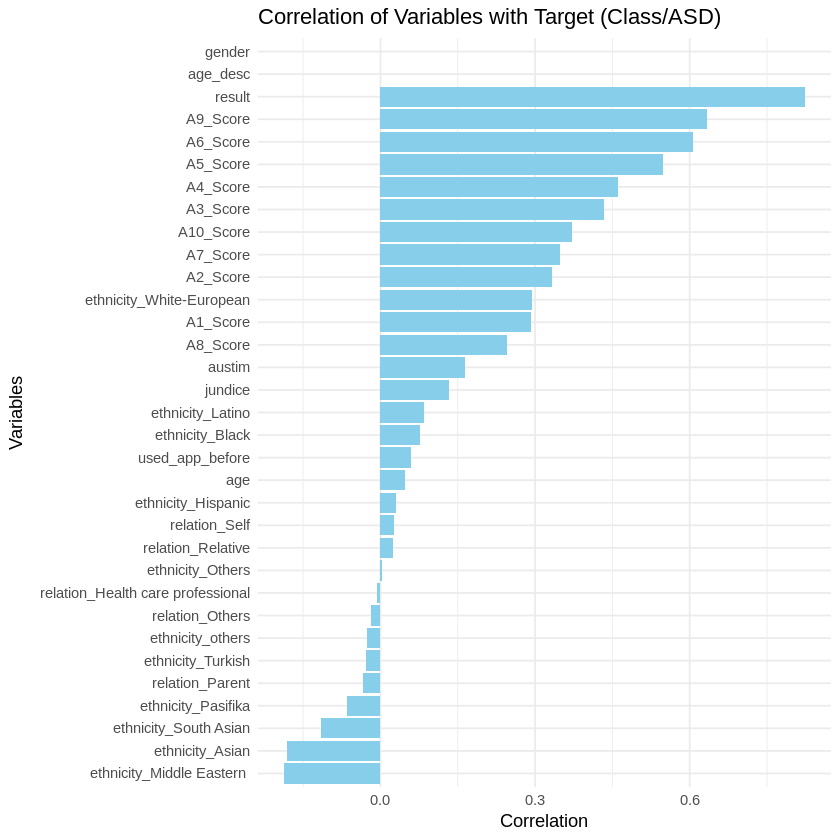

In [ ]:
# Load necessary library
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Compute the correlation matrix
# Ensure all columns used in correlation are numeric
numeric_data <- autism_data %>% select(where(is.numeric))
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Get correlations with the target variable 'Class/ASD'
target_correlations <- correlation_matrix[, "Class/ASD"]
target_correlations <- target_correlations[!names(target_correlations) %in% "Class/ASD"]

# Create a data frame for plotting
correlation_df <- data.frame(
  Variable = names(target_correlations),
  Correlation = target_correlations
) %>%
  arrange(desc(abs(Correlation))) # Sort by absolute correlation value

# Create the bar plot
ggplot(correlation_df, aes(x = reorder(Variable, Correlation), y = Correlation)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Correlation of Variables with Target (Class/ASD)",
    x = "Variables",
    y = "Correlation"
  )


Display a heatmap plot for the correlation matrix between each pair of numeric columns. Examine the heatmap and focus on correlations involving the target variable (Class/ASD). Which features show strong positive or negative correlations with the target variable? What do these correlations imply in the context of the dataset? Discuss whether any pairs of features show high correlation with each other. What does a high or low correlation mean? Answer these questions at the end of the notebook.

Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message in cor(numeric_data, use = "complete.obs"):
“the standard deviation is zero”


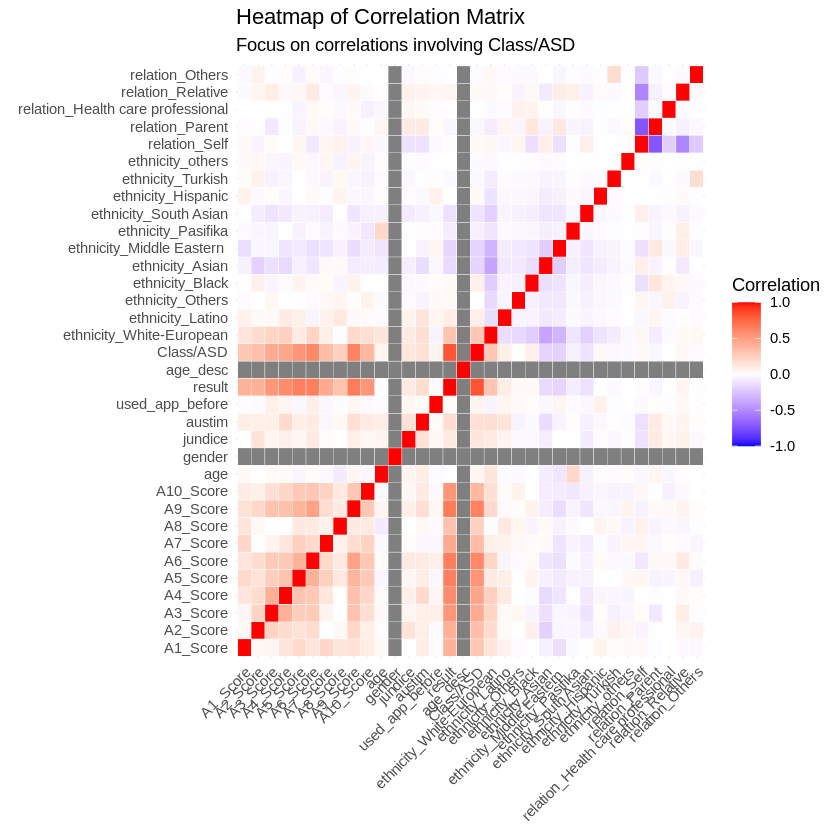

In [ ]:
# Load necessary libraries
if (!require("reshape2")) install.packages("reshape2")
if (!require("ggplot2")) install.packages("ggplot2")

library(reshape2)
library(ggplot2)

# Compute the correlation matrix for numeric columns
numeric_data <- autism_data %>% select(where(is.numeric))
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Melt the correlation matrix for ggplot2
correlation_melted <- melt(correlation_matrix)

# Create the heatmap
ggplot(data = correlation_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white",
    midpoint = 0, limit = c(-1, 1), space = "Lab",
    name = "Correlation"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    axis.title = element_blank()
  ) +
  labs(
    title = "Heatmap of Correlation Matrix",
    subtitle = "Focus on correlations involving Class/ASD"
  )


## Describe our data by its statistics

at the first we should to get some information from our data, by using describe it

In [ ]:
# Load necessary library for detailed summary (if not installed)
if (!require("psych")) install.packages("psych")
library(psych)

# Obtain a summary of the dataset
cat("Summary of the dataset:\n")
summary(autism_data)

# Obtain a detailed description using psych::describe
cat("\nDetailed description of numeric variables:\n")
psych::describe(autism_data %>% select(where(is.numeric)))

# Display structure of the dataset for column types
cat("\nStructure of the dataset:\n")
str(autism_data)


Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Summary of the dataset:


    A1_Score        A2_Score        A3_Score        A4_Score    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :1.736   Mean   :1.467   Mean   :1.479   Mean   :1.521  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                                                                
    A5_Score        A6_Score        A7_Score        A8_Score    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :1.523   Mean   :1.307   Mean   :1.424   Mean   :1.659  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                         


Detailed description of numeric variables:


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1_Score,1,599,1.736227045,0.44104595,2,1.79417879,0.0000,1,2,1,-1.06942453,-0.8577548,0.018020649
A2_Score,2,599,1.467445743,0.49935609,1,1.45945946,0.0000,1,2,1,0.13016727,-1.9863643,0.020403137
A3_Score,3,599,1.479131886,0.49998185,1,1.47401247,0.0000,1,2,1,0.08333613,-1.9963796,0.020428705
A4_Score,4,599,1.520868114,0.49998185,2,1.52598753,0.0000,1,2,1,-0.08333613,-1.9963796,0.020428705
A5_Score,5,599,1.522537563,0.49990926,2,1.52806653,0.0000,1,2,1,-0.09001609,-1.9952197,0.020425739
A6_Score,6,599,1.307178631,0.46170966,1,1.25987526,0.0000,1,2,1,0.83385505,-1.3068591,0.018864945
A7_Score,7,599,1.424040067,0.49460944,1,1.40540541,0.0000,1,2,1,0.30663839,-1.9091518,0.020209194
A8_Score,8,599,1.659432387,0.47429618,2,1.69854470,0.0000,1,2,1,-0.67116806,-1.5521163,0.019379217
A9_Score,9,599,1.338898164,0.47373079,1,1.29937630,0.0000,1,2,1,0.67900542,-1.5415168,0.019356115



Structure of the dataset:
tibble [599 × 35] (S3: tbl_df/tbl/data.frame)
 $ A1_Score                         : num [1:599] 2 2 2 2 2 1 2 2 2 2 ...
 $ A2_Score                         : num [1:599] 2 2 2 2 2 2 2 2 2 2 ...
 $ A3_Score                         : num [1:599] 2 1 1 1 2 1 2 1 2 2 ...
 $ A4_Score                         : num [1:599] 2 2 2 2 2 1 2 1 2 2 ...
 $ A5_Score                         : num [1:599] 1 1 2 1 2 1 1 2 1 2 ...
 $ A6_Score                         : num [1:599] 1 1 1 1 1 1 1 1 2 2 ...
 $ A7_Score                         : num [1:599] 2 1 2 2 2 1 1 1 2 2 ...
 $ A8_Score                         : num [1:599] 2 2 2 2 2 2 1 2 2 2 ...
 $ A9_Score                         : num [1:599] 1 1 2 1 2 1 2 2 2 2 ...
 $ A10_Score                        : num [1:599] 1 2 2 2 2 1 1 2 1 2 ...
 $ age                              : num [1:599] 26 24 27 35 36 17 64 29 17 33 ...
 $ gender                           : num [1:599] 0 0 0 0 0 0 0 0 0 0 ...
 $ jundice                   

### Now please compute the average of all columns in our dataset to gain more insight about it.

In [8]:
# Compute the average (mean) of all numeric columns using the updated syntax
column_means <- autism_data %>%
  select(where(is.numeric)) %>%
  summarise(across(everything(), \(x) mean(x, na.rm = TRUE))) # Updated syntax for dplyr >= 1.1.0

cat("Average of some numeric column:\n")
# Display the means for some numeric columns
print(column_means)

# Display the means
cat("Average of each numeric column:\n")
# Convert tibble to data.frame and print
column_means_df <- as.data.frame(column_means)
print(column_means_df)




Average of some numeric column:
# A tibble: 1 × 34
  A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score
     <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
1     1.74     1.47     1.48     1.52     1.52     1.31     1.42     1.66
# ℹ 26 more variables: A9_Score <dbl>, A10_Score <dbl>, age <dbl>,
#   gender <dbl>, jundice <dbl>, austim <dbl>, used_app_before <dbl>,
#   result <dbl>, age_desc <dbl>, `Class/ASD` <dbl>,
#   `ethnicity_White-European` <dbl>, ethnicity_Latino <dbl>,
#   ethnicity_Others <dbl>, ethnicity_Black <dbl>, ethnicity_Asian <dbl>,
#   `ethnicity_Middle Eastern ` <dbl>, ethnicity_Pasifika <dbl>,
#   `ethnicity_South Asian` <dbl>, ethnicity_Hispanic <dbl>, …
Average of each numeric column:
  A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score
1 1.736227 1.467446 1.479132 1.520868 1.522538 1.307179  1.42404 1.659432
  A9_Score A10_Score      age gender   jundice    austim used_app_before
1 1.338898  1.595993

## Questions

1- Please explain the advantages and disadvantages of one-hot encoding for categorical data, and also introduce another way to handle categorical features in our dataset

2- Answer the question from the correlation compution section.

In [ ]:
1.
Advantages and Disadvantages of One-Hot Encoding:
  Advantages of One-Hot Encoding:
    Simple and Easy to Implement
    No Ordinal Relationship Assumption
    Avoids Model Bias
    Good for Linear Models
  Disadvantages of One-Hot Encoding:
    High Dimensionality (curse of dimensionality)
    Interpretability Issues
    Model Complexity

Alternative to One-Hot Encoding:
  Label Encoding: This is useful when the categorical variable has an inherent order (e.g., "Low" -> 0, "Medium" -> 1, "High" -> 2).
    Advantages of Label Encoding:
      More compact representation (i.e., fewer features).
      Can handle large categorical variables efficiently.
    Disadvantages of Label Encoding:
      Assumes that the categorical values have an ordinal relationship (which may not be true).
      For unordered categories, this could introduce a misleading relationship between values.
  Target Encoding: Each category of the feature is replaced with the mean of the target variable for that category. This can be a good approach when there is a strong correlation between the categorical feature and the target.
    Advantages of Target Encoding:
      It can reduce the dimensionality problem compared to one-hot encoding.
      Useful when there is a clear relationship between the category and the target.
    Disadvantages of Target Encoding:
      Prone to overfitting, especially when there are many categories with sparse data.
      Requires careful handling, such as smoothing, to avoid data leakage or overfitting.
2.
Answer to the Question from the Correlation Computation Section:
  Which Features Show Strong Positive or Negative Correlations with the Target Variable (Class/ASD)?
    After computing the correlation with Class/ASD, features such as age (if it has a strong correlation) might be indicative of age-related factors associated with autism.
    Features like A1_Score to A10_Score, used_app_before, jundice, or austim could show positive or negative correlations depending on their association with autism diagnosis.
    Strong Positive Correlation: A high positive correlation (e.g., 0.7+) means that as the feature increases, the likelihood of the target (Class/ASD) being positive increases.
    Strong Negative Correlation: A strong negative correlation (e.g., -0.7-) suggests that as the feature increases, the likelihood of the target being negative (non-autistic) increases.

  What Do These Correlations Imply in the Context of the Dataset?
    Positive Correlation with Class/ASD: If, for example, A1_Score has a positive correlation with Class/ASD, it suggests that higher scores in A1_Score are likely associated with a higher likelihood of the person having autism.
    Negative Correlation with Class/ASD: Features like age or gender might show a negative correlation, implying that these features are more likely to be associated with non-autistic individuals.

  Do Any Pairs of Features Show High Correlation with Each Other?
    Highly Correlated Pairs: It’s possible that features like A1_Score to A10_Score could show high correlation with each other (e.g., 0.8 or higher). This is expected, as they likely measure similar aspects of autism.
  What Does High Correlation Mean?
    High correlation (e.g., 0.9) between two features means that they contain similar information. In modeling, this could lead to multicollinearity, where the model might overemphasize redundant features.
  What Does Low Correlation Mean?
    Low or near-zero correlation means that the two features are unrelated, providing independent information that may be useful for the model.